# Import Packages

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

# 100 mp

In [73]:
mass100 = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/100BH.txt", delimiter = ',')
fmass100 = mass100[:,2]
avg100 = np.mean(fmass100[fmass100 > 1])
print("Number of Extremal BH's for M_i = 100 mp:", len(fmass100))

Number of Extremal BH's for M_i = 100 mp: 12000


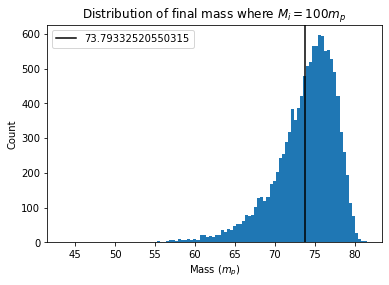

In [74]:
plt.hist(fmass100[fmass100 > 1], bins = 100)
plt.axvline(avg100, color = 'black', label = avg100)
plt.legend()
plt.title("Distribution of final mass where $M_i = 100 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/100BH.png")
plt.show()

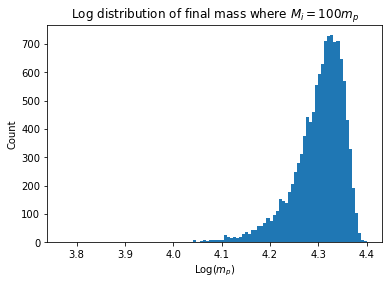

In [75]:
plt.hist(np.log(fmass100[fmass100 > 1]), bins = 100)
#plt.axvline(np.mean(fmass200[fmass200 > 1]), color = 'black', label = np.mean(fmass200[fmass200 > 1]) )
#plt.legend()
plt.title("Log distribution of final mass where $M_i = 100 m_p$")
plt.xlabel("Log($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/Log100BH.png")
plt.show()

# 200 mp

In [76]:
mass200 = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/200BH.txt", delimiter = ',')
fmass200 = mass200[:,2]
avg200 = np.mean(fmass200[fmass200 > 1])
print("Number of Extremal BH's for M_i = 200 mp:", len(fmass200))

Number of Extremal BH's for M_i = 200 mp: 12000


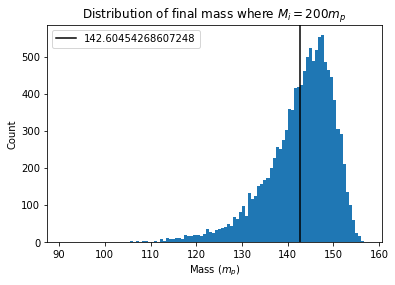

In [77]:
plt.hist(fmass200[fmass200 > 1], bins = 100)
plt.axvline(np.mean(fmass200[fmass200 > 1]), color = 'black', label = np.mean(fmass200[fmass200 > 1]) )
plt.legend()
plt.title("Distribution of final mass where $M_i = 200 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/200BH.png")
plt.show()

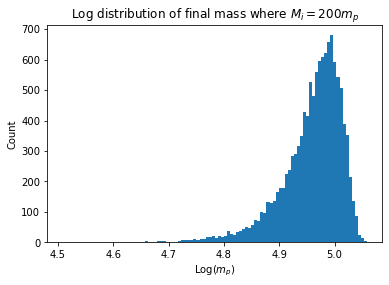

In [78]:
plt.hist(np.log(fmass200[fmass200 > 1]), bins = 100)
#plt.axvline(np.mean(fmass200[fmass200 > 1]), color = 'black', label = np.mean(fmass200[fmass200 > 1]) )
#plt.legend()
plt.title("Log distribution of final mass where $M_i = 200 m_p$")
plt.xlabel("Log($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/Log200BH.png")
plt.show()

# 500 mp

In [79]:
mass500 = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/500BH.txt", delimiter = ',')
fmass500 = mass500[:,2]
avg500 = np.mean(fmass500[fmass500 > 1])
print("Number of Extremal BH's for M_i = 500 mp:", len(fmass500))

Number of Extremal BH's for M_i = 500 mp: 7475


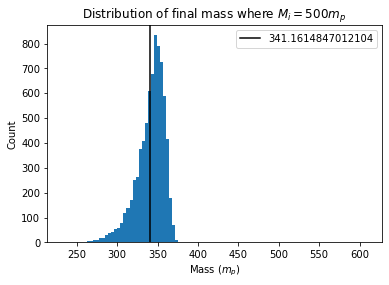

In [80]:
plt.hist(fmass500[fmass500 > 1], bins = 100)
plt.axvline(np.mean(fmass500[fmass500 > 1]), color = 'black', label = np.mean(fmass500[fmass500 > 1]) )
plt.legend()
plt.title("Distribution of final mass where $M_i = 500 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/500BH.png")
plt.show()

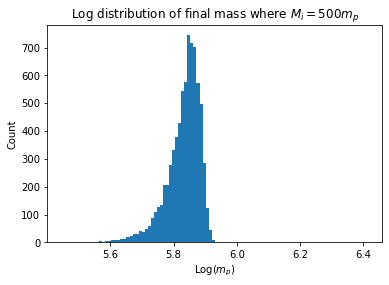

In [81]:
plt.hist(np.log(fmass500[fmass500 > 1]), bins = 100)
# plt.axvline(np.mean(fmass500[fmass500 > 1]), color = 'black', label = np.mean(fmass500[fmass500 > 1]) )
# plt.legend()
plt.title("Log distribution of final mass where $M_i = 500 m_p$")
plt.xlabel("Log($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/Log500BH.png")
plt.show()

# 1000 mp

In [82]:
mass1k = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/1000BH.txt", delimiter = ',')
fmass1k = mass1k[:,2]
avg1k = np.mean(fmass1k[fmass1k > 1])
print("Number of Extremal BH's for M_i = 1000 mp:", len(fmass1k))

Number of Extremal BH's for M_i = 1000 mp: 2933


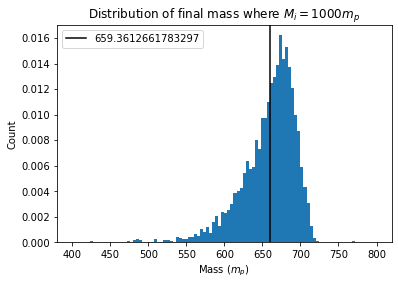

In [100]:
plt.hist(fmass1k[fmass1k > 1], bins = 100, density = True, range = (400, 800))
plt.axvline(np.mean(fmass1k[fmass1k > 1]), color = 'black', label = np.mean(fmass1k[fmass1k > 1]) )
plt.legend()
plt.title("Distribution of final mass where $M_i = 1000 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/1000BH.png")
plt.show()

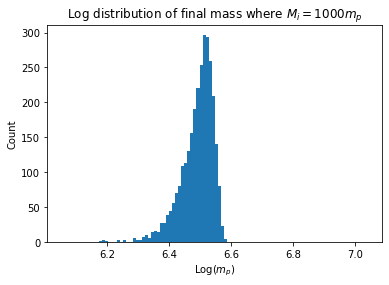

In [84]:
plt.hist(np.log(fmass1k[fmass1k > 1]), bins = 100)
# plt.axvline(np.mean(fmass500[fmass500 > 1]), color = 'black', label = np.mean(fmass500[fmass500 > 1]) )
# plt.legend()
plt.title("Log distribution of final mass where $M_i = 1000 m_p$")
plt.xlabel("Log($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/Log1000BH.png")
plt.show()

# 5000 mp

In [85]:
mass5k = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/5000BH.txt", delimiter = ',')
fmass5k = mass5k[:,2]
avg5k = np.mean(fmass5k[fmass5k > 1])
print("Number of Extremal BH's for M_i = 5000 mp:", len(fmass5k))

Number of Extremal BH's for M_i = 5000 mp: 151


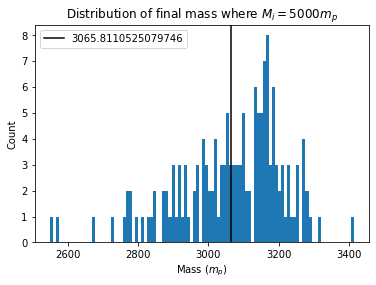

In [86]:
plt.hist(fmass5k[fmass5k > 1], bins = 100)
plt.axvline(np.mean(fmass5k[fmass5k > 1]), color = 'black', label = np.mean(fmass5k[fmass5k > 1]) )
plt.legend()
plt.title("Distribution of final mass where $M_i = 5000 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/5000BH.png")
plt.show()

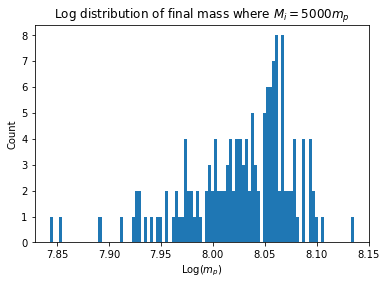

In [87]:
plt.hist(np.log(fmass5k[fmass5k > 1]), bins = 100)
plt.title("Log distribution of final mass where $M_i = 5000 m_p$")
plt.xlabel("Log($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/Log5000BH.png")
plt.show()

# Percentage of extremal mass

In [91]:
P5k = (5000-avg5k)/5000
P1k = (1000-avg1k)/1000
P500 = (500-avg500)/500
P200 = (200-avg200)/200
P100 = (100-avg100)/100

In [92]:
print("Average mass of extremal black hole is", P5k,"% of the initial mass for m_i = 5000 mp")
print("Average mass of extremal black hole is", P1k,"% of the initial mass for m_i = 1000 mp")
print("Average mass of extremal black hole is", P500,"% of the initial mass for m_i = 500 mp")
print("Average mass of extremal black hole is", P200,"% of the initial mass for m_i = 200 mp")
print("Average mass of extremal black hole is", P100,"% of the initial mass for m_i = 100 mp")

Average mass of extremal black hole is 0.3868377894984051 % of the initial mass for m_i = 5000 mp
Average mass of extremal black hole is 0.34063873382167026 % of the initial mass for m_i = 1000 mp
Average mass of extremal black hole is 0.31767703059757924 % of the initial mass for m_i = 500 mp
Average mass of extremal black hole is 0.2869772865696376 % of the initial mass for m_i = 200 mp
Average mass of extremal black hole is 0.2620667479449685 % of the initial mass for m_i = 100 mp


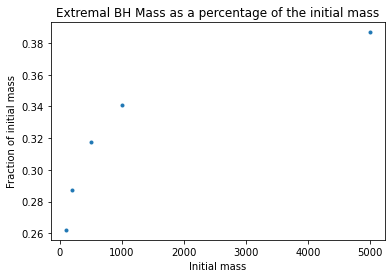

In [93]:
Parray = np.array((P100,P200,P500,P1k,P5k))
Marray = np.array((100,200,500,1000,5000))
plt.plot(Marray, Parray, '.')
plt.title("Extremal BH Mass as a percentage of the initial mass")
plt.xlabel("Initial mass")
plt.ylabel("Fraction of initial mass")
plt.show()

In [106]:
bh100equal = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/100BH_equalprob.txt", delimiter = ',')
fmass100equal = bh100equal[:,2]
equalmean = np.mean(fmass100equal)

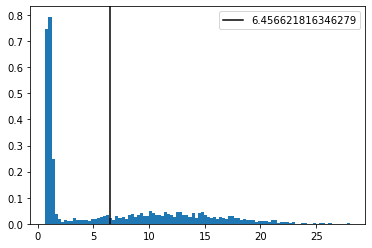

In [109]:
plt.hist(fmass100equal, bins = 100, density = True)
plt.axvline(equalmean, color = 'black', label = equalmean)
plt.legend()
plt.show()